<Center> Lesson 4: Vortex 

## compute a vortex 

In [23]:
import numpy as np
import math 
from matplotlib import pyplot 
N = %matplotlib inline 

In [24]:
N = 50

x_s, x_e = -2.0, 2.0
y_s, y_e = -1.0, 1.0

x = np.linspace(x_s,x_e, N)

y = np.linspace(y_s,y_e, N)

X,Y = np.meshgrid(x,y)


In [25]:
x_vortext = 0.0
y_vortext = 0.0

G = 5.0

In [26]:
def get_streamfunction_vortex_veolcity(strength, xv, yv, X, Y):
    u = + strength* (Y-yv) /( (2*np.pi)*(X-xv)**2+(Y-yv)**2)
    v = - strength* (X-xv) /( (2*np.pi)*(X-xv)**2+(Y-yv)**2)
    psi = (strength * np.log((Y-yv)**2 + (X-xv)**2) )/4*np.pi
    return u,v,psi

In [27]:
u_vortext, v_vortext, psi_vortext = get_streamfunction_vortex_veolcity(G, x_vortext, y_vortext, X,Y)

Plot the stream function for the vortext field 

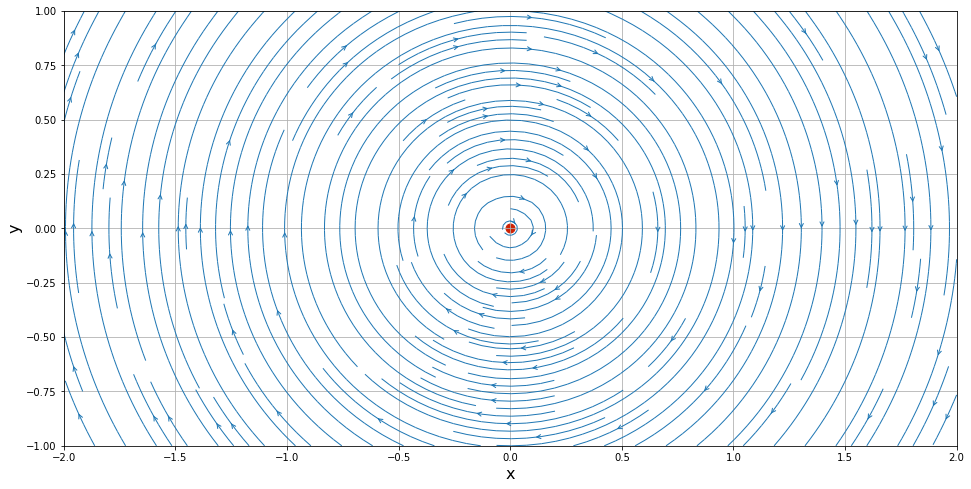

In [31]:
width  = 16
height = (y_e - y_s)/ (x_e - x_s) * width 
pyplot.figure(figsize=(width, height))

pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_s, x_e)
pyplot.ylim(y_s, y_e)

pyplot.streamplot(X, Y, u_vortext, v_vortext, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
#to plot the streamlines 
pyplot.scatter(x_vortext, y_vortext, color='#CD2305', s=80, marker='o' )

pyplot.show()

Multiple number of vorticies 

In [108]:
x_vortex = np.rand(N,N)
u_vortices = np.zeros((N,N))
v_vortices = np.zeros((N,N))
psi_vorticies = np.zeros((N,N))

for i in range(10):
    u_vortext1, v_vortext1, psi_vortext1 = get_streamfunction_vortex_veolcity(G, x_vortext[i], y_vortext[i], X,Y)
    u_vortices += u_vortext1
    v_vortices += v_vortext1
    psi_vorticies += psi_vortext1


AttributeError: module 'numpy' has no attribute 'rand'

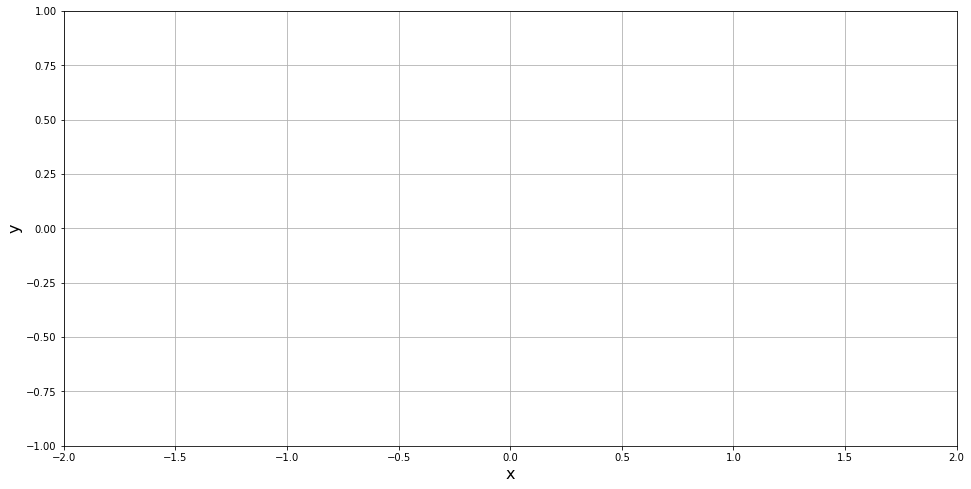

In [106]:
u = u_vortices
v = v_vortices

width  = 16
height = (y_e - y_s)/ (x_e - x_s) * width 
pyplot.figure(figsize=(width, height))

pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_s, x_e)
pyplot.ylim(y_s, y_e)

pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
#to plot the streamlines 

pyplot.show()

Sink Singularity 

In [67]:
strength_sink = -1.0
x_sink, y_sink = 1.0 , 0.0

In [68]:
def get_stream_veolcity_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return u, v, psi

In [69]:
u_sink, v_sink, psi_sink = get_stream_veolcity_function(strength_sink, x_sink, y_sink, X, Y)

In [70]:
u_tot = u_vortext + u_sink
v_tot = v_vortext + v_sink
psi_tot = psi_vortext + psi_sink

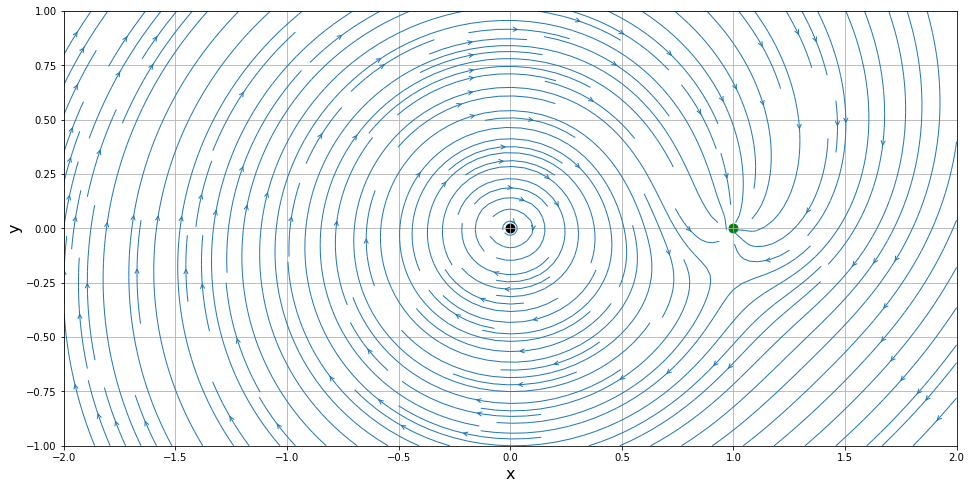

In [71]:
width  = 16
height = (y_e - y_s)/ (x_e - x_s) * width 
pyplot.figure(figsize=(width, height))

pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_s, x_e)
pyplot.ylim(y_s, y_e)

pyplot.streamplot(X, Y, u_tot, v_tot, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
#to plot the streamlines 
pyplot.scatter(x_vortext, y_vortext, color='black', s=80, marker='o' )
pyplot.scatter(x_sink, y_sink, color='green', s=80, marker='o' )

pyplot.show()

This will help to compute a lift around an object 

In [80]:
x_source, y_source  = -1.0, 0.0
strength_source = 1

In [81]:
def get_stream_veolcity_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return u, v, psi

In [82]:
u_source, v_source, psi_source = get_stream_veolcity_function(strength_source, x_source, y_source, X, Y)

In [83]:
u_tot1 = u_vortext + u_source

v_tot1 = v_vortext + v_source 

psi_tot1 = psi_vortext + psi_source 

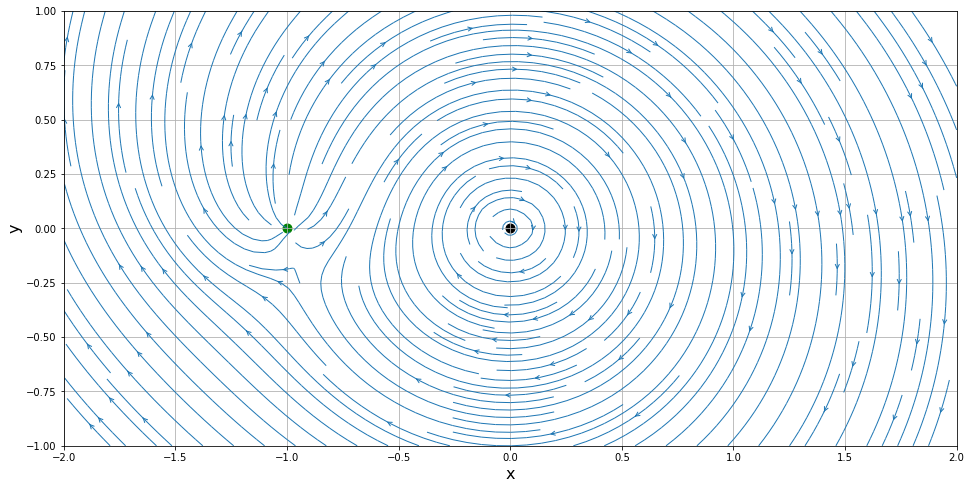

In [84]:
width  = 16
height = (y_e - y_s)/ (x_e - x_s) * width 
pyplot.figure(figsize=(width, height))

pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_s, x_e)
pyplot.ylim(y_s, y_e)

pyplot.streamplot(X, Y, u_tot1, v_tot1, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
#to plot the streamlines 
pyplot.scatter(x_vortext, y_vortext, color='black', s=80, marker='o' )
pyplot.scatter(x_source, y_source, color='green', s=80, marker='o' )

pyplot.show()

In [85]:
u_tot2 = u_vortext + u_source +u_sink
 
v_tot2 = v_vortext + v_source + v_sink

psi_tot2 = psi_vortext + psi_source +psi_sink

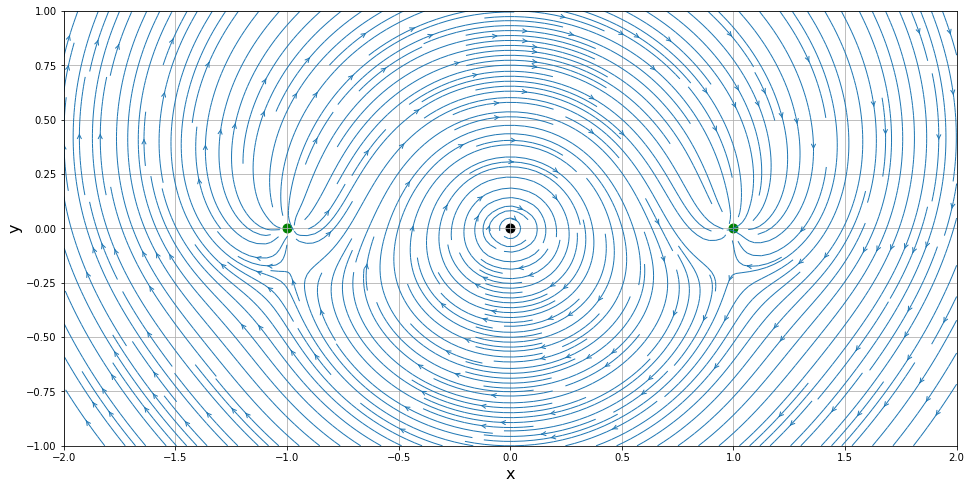

In [87]:
width  = 16
height = (y_e - y_s)/ (x_e - x_s) * width 
pyplot.figure(figsize=(width, height))

pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_s, x_e)
pyplot.ylim(y_s, y_e)

pyplot.streamplot(X, Y, u_tot2, v_tot2, density=3, linewidth=1, arrowsize=1, arrowstyle='->')
#to plot the streamlines 
pyplot.scatter(x_vortext, y_vortext, color='black', s=80, marker='o' )
pyplot.scatter(x_source, y_source, color='green', s=80, marker='o' )
pyplot.scatter(x_sink, y_sink, color='green', s=80, marker='o' )
pyplot.show()